<a href="https://colab.research.google.com/github/minicks/BigI/blob/master/Keras_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 코랩에서는 다음 코드로 베타버전을 설치한다.
# !pip install tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
# tf.__version__

In [0]:
from tensorflow import keras
keras.__version__

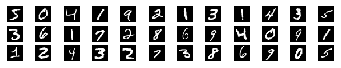

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl

mnist = keras.datasets.mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()


plt.figure(figsize=(6, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap="gray")
    plt.axis("off")
plt.show()

In [19]:
help(tensorflow)

NameError: ignored

In [0]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)


In [0]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

In [0]:
y_train0[:5]

In [0]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[:5]

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import numpy as np

np.random.seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
# model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error', metrics=["accuracy"])
model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=["accuracy"])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [22]:
l1 = model.layers[0]
l2 = model.layers[1]

print(l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params())
print(l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params())

dense_2 <class 'tensorflow.python.keras.layers.core.Dense'> (None, 15) sigmoid 11775
dense_3 <class 'tensorflow.python.keras.layers.core.Dense'> (None, 10) sigmoid 160


In [44]:
%%time
hist = model.fit(X_train, Y_train,
                 epochs=20, batch_size=100,
                 validation_data=(X_test, Y_test),
                 verbose=2) # 0, 1, 2

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 1s - loss: 0.3928 - acc: 0.8874 - val_loss: 0.3059 - val_acc: 0.9135
Epoch 2/20
60000/60000 - 1s - loss: 0.2877 - acc: 0.9195 - val_loss: 0.2767 - val_acc: 0.9184
Epoch 3/20
60000/60000 - 1s - loss: 0.2686 - acc: 0.9226 - val_loss: 0.2785 - val_acc: 0.9204
Epoch 4/20
60000/60000 - 1s - loss: 0.2458 - acc: 0.9298 - val_loss: 0.2468 - val_acc: 0.9311
Epoch 5/20
60000/60000 - 1s - loss: 0.2366 - acc: 0.9312 - val_loss: 0.2423 - val_acc: 0.9290
Epoch 6/20
60000/60000 - 1s - loss: 0.2278 - acc: 0.9344 - val_loss: 0.2528 - val_acc: 0.9264
Epoch 7/20
60000/60000 - 1s - loss: 0.2242 - acc: 0.9351 - val_loss: 0.2559 - val_acc: 0.9261
Epoch 8/20
60000/60000 - 1s - loss: 0.2199 - acc: 0.9356 - val_loss: 0.2313 - val_acc: 0.9349
Epoch 9/20
60000/60000 - 1s - loss: 0.2172 - acc: 0.9373 - val_loss: 0.2473 - val_acc: 0.9299
Epoch 10/20
60000/60000 - 1s - loss: 0.2118 - acc: 0.9384 - val_loss: 0.2442 - val_acc: 0.9308
Epoch 11/

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_

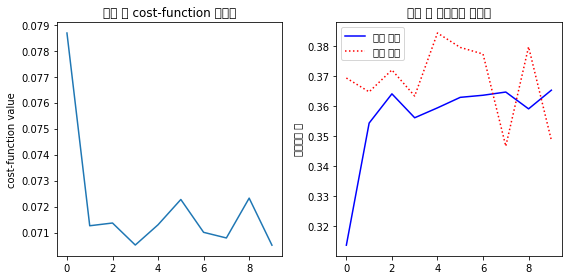

In [24]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("훈련 중 cost-function 그래프")
plt.ylabel("cost-function value")
plt.subplot(1, 2, 2)
plt.title("훈련 중 성능지표 그래프")
plt.ylabel("성능지표 값")
plt.plot(hist.history['acc'], 'b-', label="학습 성능")
plt.plot(hist.history['val_acc'], 'r:', label="검증 성능")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# 첫번째 레이어
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 15), (15,))

In [26]:
# 두번째 레이어
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((15, 10), (10,))

In [27]:
model.predict(X_test[:1, :])

array([[4.1723251e-07, 8.7678432e-05, 0.0000000e+00, 1.9012299e-01,
        1.6661111e-01, 5.6883693e-04, 2.0155111e-01, 4.0839523e-02,
        3.7618736e-03, 5.8023997e-02]], dtype=float32)

In [28]:
model.predict_classes(X_test[:1, :], verbose=0)

array([6])

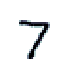

In [31]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()

In [32]:
print(model.predict_classes(X_test[:1, :], verbose=0))

[6]


In [0]:
model.save('my_model.hdf5')
del model

In [0]:
from tensorflow.keras.models import load_model

model2 = load_model('my_model.hdf5')
print(model2.predict_classes(X_test[:1, :], verbose=0))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[7]
